In [1]:
#importing the required libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [6]:
#Loading the dataset

df = pd.read_csv(r"C:\Users\Radhika\Downloads\Micro-Credit-Project\Micro Credit Project\Data file.csv")
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [7]:
# dropping the un wanted column,

df = df.drop(columns = 'Unnamed: 0')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [8]:
  df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000


In [26]:
#Splitting day and month and dropping the actual column date and some un-wanted columns - msisdn,pcircle.

df['pday'] = pd.DatetimeIndex(df['pdate']).day
df['pmonth'] = pd.DatetimeIndex(df['pdate']).month
df= df.drop(columns=['pdate','msisdn','pcircle'],axis = 1)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,3712.202921,1539,2,...,6.0,0.054029,2.0,12,6,0.046077,29.000000,29.000000,20,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,3712.202921,5787,1,...,12.0,0.054029,1.0,12,12,0.046077,3.398826,4.321485,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,3712.202921,1539,1,...,6.0,0.054029,1.0,6,6,0.046077,3.398826,4.321485,19,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,3712.202921,947,0,...,6.0,0.054029,2.0,12,6,0.046077,3.398826,4.321485,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,3712.202921,2309,7,...,6.0,0.054029,7.0,42,6,0.046077,2.333333,2.333333,22,6


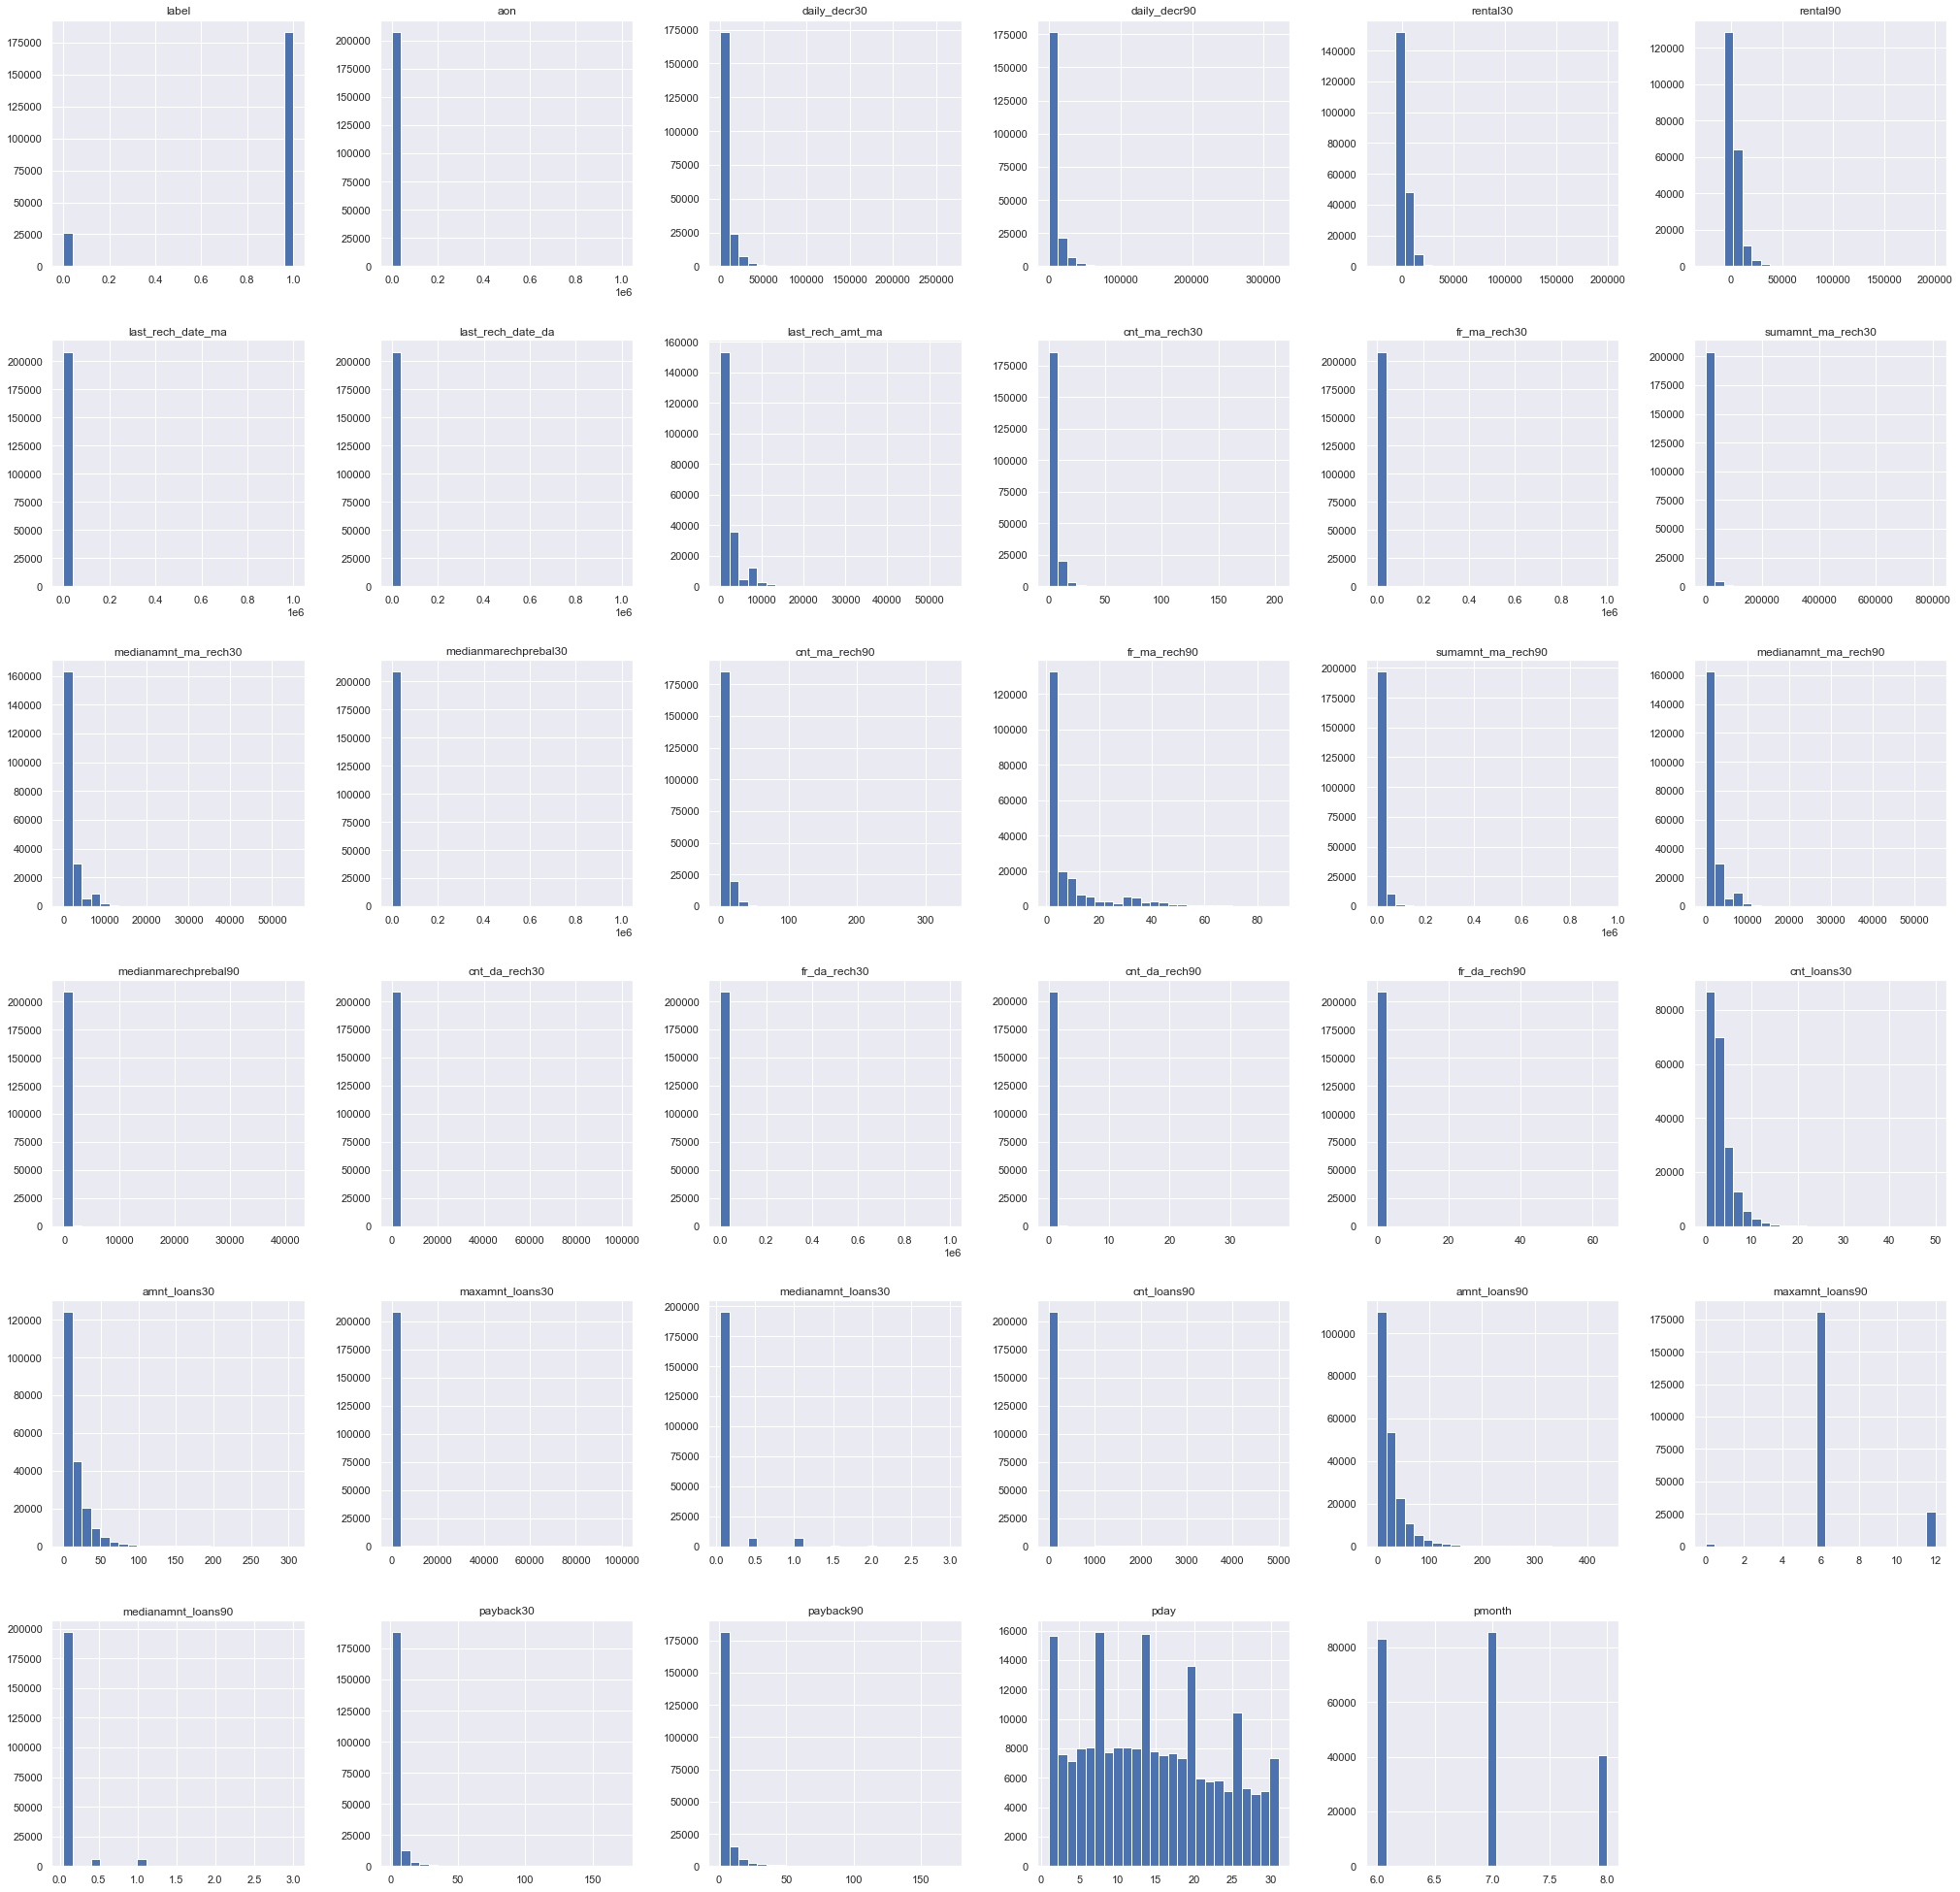

In [28]:
#Visualizing the data in histogram plot,

sns.set_theme()
df.hist(bins = 25, figsize = (35,35))
plt.show()

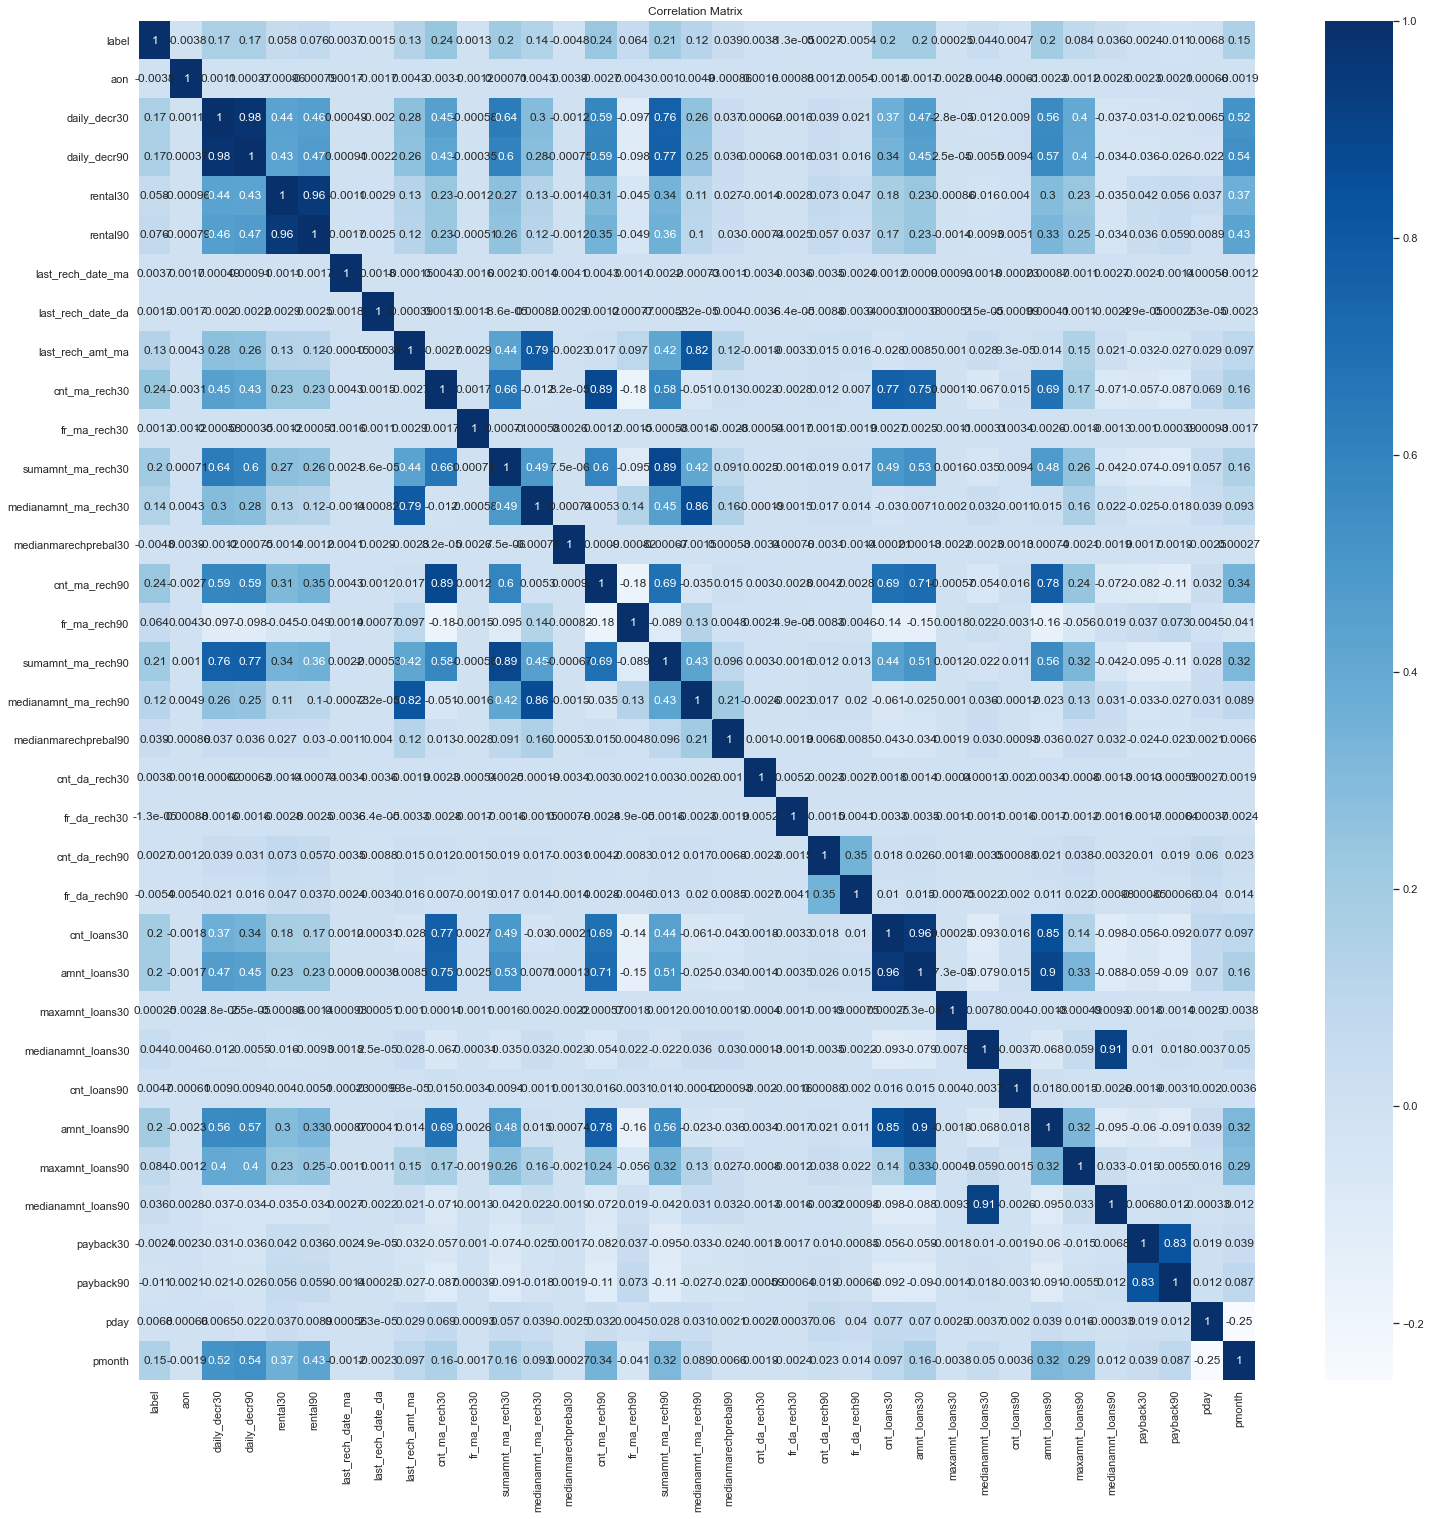

In [29]:
#correlation matrix 

corr = df.corr()
plt.figure(figsize = (25,25))
sns.heatmap(corr,cmap = 'Blues', annot = True)
plt.title("Correlation Matrix ")
plt.show()

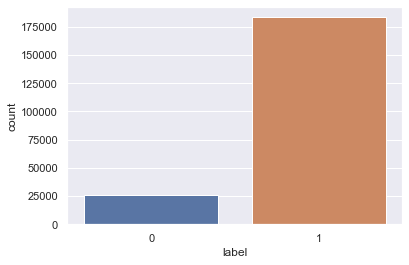

In [12]:
# We can see that most of the customer will be paying back the loaned amount within 5 days of insurance of loan. 
#In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, 
#Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

sns.countplot(df['label'])
plt.show()

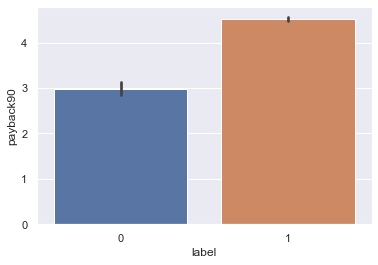

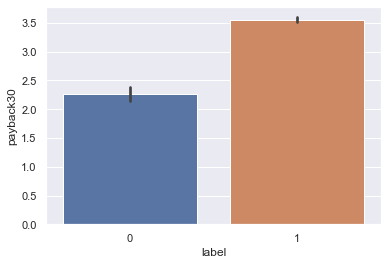

In [13]:
# Customer is paying back the loan by 3-5 days.

sns.barplot(x = df['label'], y = df['payback90'])
plt.show()
sns.barplot(x = df['label'], y = df['payback30'])
plt.show()

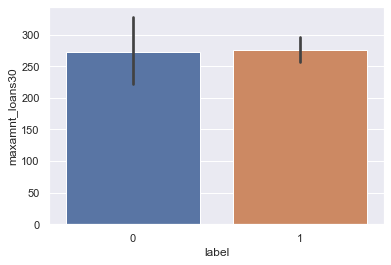

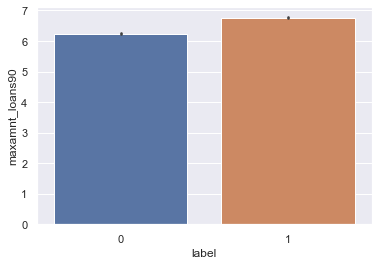

In [14]:
# There are only 2 options 5,10 and Customer needs to pay 6rs for 5 and 12rs for 10.
# defaulters  are opting maximum amount of loan than non - defaulters.

sns.barplot(x = df['label'], y = df['maxamnt_loans30'])
plt.show()
sns.barplot(x = df['label'], y = df['maxamnt_loans90'])
plt.show()

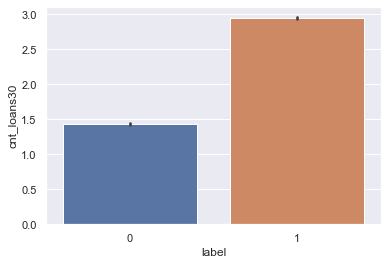

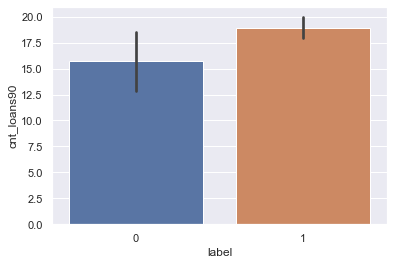

In [15]:
#Deafaulters has taken less number of loans than non-defaulters .

sns.barplot(x = df['label'], y = df['cnt_loans30'])
plt.show()
sns.barplot(x = df['label'], y = df['cnt_loans90'])
plt.show()

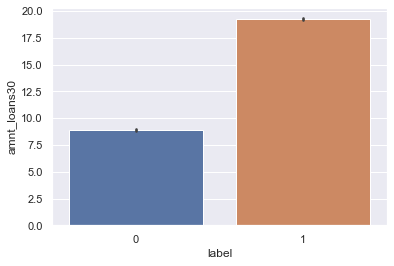

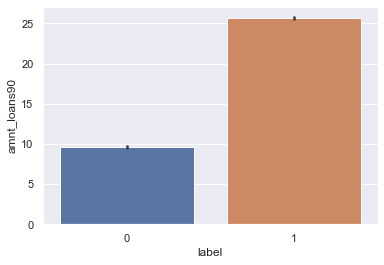

In [16]:
# defaulters has taken less loans than non defaulters.

sns.barplot(x = df['label'], y = df['amnt_loans30'])
plt.show()
sns.barplot(x = df['label'], y = df['amnt_loans90'])
plt.show()

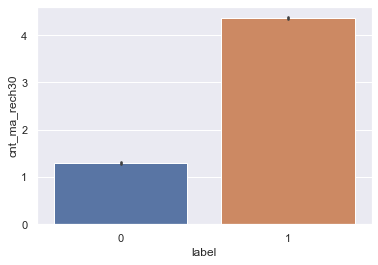

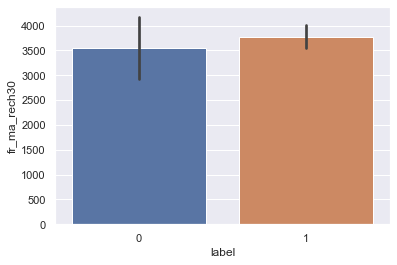

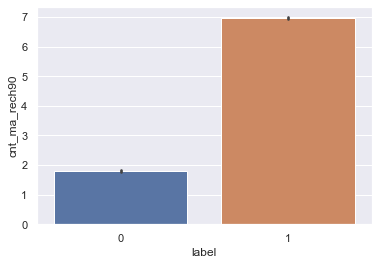

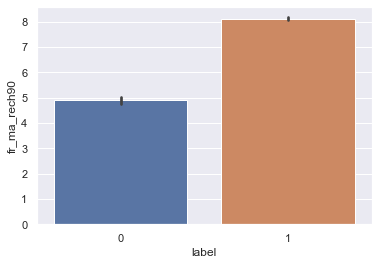

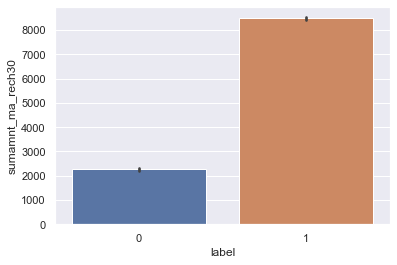

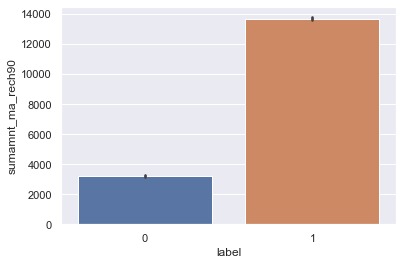

In [17]:
#frequency of main account recharged by more number of defaulters in < 30 days.

sns.barplot(x = df['label'], y = df['cnt_ma_rech30'])
plt.show()
sns.barplot(x = df['label'], y = df['fr_ma_rech30'])
plt.show()
sns.barplot(x = df['label'], y = df['cnt_ma_rech90'])
plt.show()
sns.barplot(x = df['label'], y = df['fr_ma_rech90'])
plt.show()
plt.show()
sns.barplot(x = df['label'], y = df['sumamnt_ma_rech30'])
plt.show()
plt.show()
sns.barplot(x = df['label'], y = df['sumamnt_ma_rech90'])
plt.show()

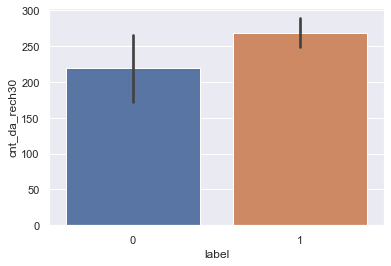

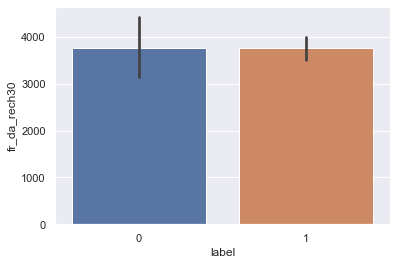

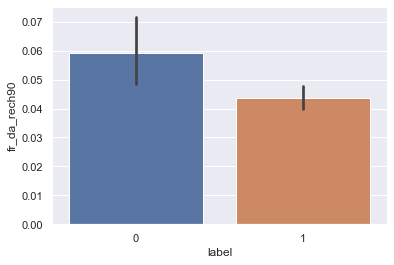

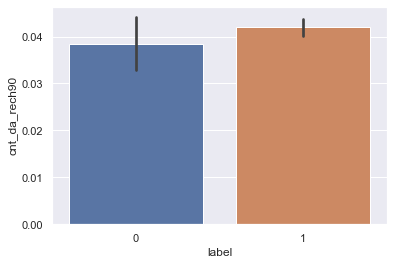

In [18]:
# frequency of Data account recharged by defaulters more  than non - defaulters.

sns.barplot(x = df['label'], y = df['cnt_da_rech30'])
plt.show()
sns.barplot(x = df['label'], y = df['fr_da_rech30'])
plt.show()
sns.barplot(x = df['label'], y = df['fr_da_rech90'])
plt.show()
sns.barplot(x = df['label'], y = df['cnt_da_rech90'])
plt.show()

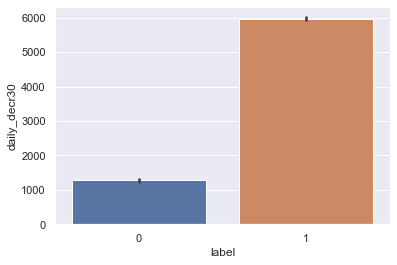

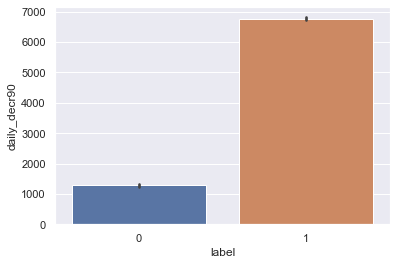

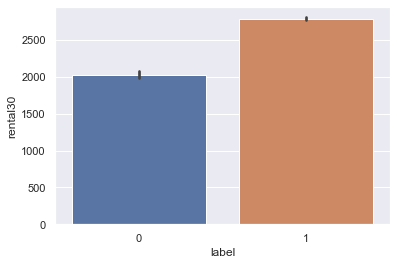

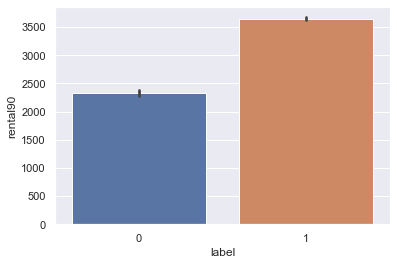

In [19]:
#Average amount spent daily from main account was more are non - defaulters.
# Average main account balance was more for non-defaulters than defaulters.

sns.barplot(x = df['label'], y= df['daily_decr30'])
plt.show()
sns.barplot(x = df['label'], y= df['daily_decr90'])
plt.show()
sns.barplot(x = df['label'], y = df['rental30'])
plt.show()
sns.barplot(x = df['label'], y = df['rental90'])
plt.show()

In [30]:
# Replacing 0 value to mean and median,

df['medianamnt_loans30'] = df['medianamnt_loans30'].replace(0,df['medianamnt_loans30'].mean())
df['medianamnt_loans90'] = df['medianamnt_loans90'].replace(0,df['medianamnt_loans90'].mean())
df['payback30'] = df['payback30'].replace(0,df['payback30'].mean())
df['payback90'] = df['payback90'].replace(0,df['payback90'].mean())
df['last_rech_date_da'] = df['last_rech_date_da'].replace(0,df['last_rech_date_da'].mean())
df['fr_ma_rech30'] = df['fr_ma_rech30'].replace(0,df['fr_ma_rech30'].median())
df['fr_ma_rech90'] = df['fr_ma_rech90'].replace(0,df['fr_ma_rech90'].median())
df['cnt_da_rech30'] = df['cnt_da_rech30'].replace(0,df['cnt_da_rech30'].mean())
df['cnt_da_rech90'] = df['cnt_da_rech90'].replace(0,df['cnt_da_rech90'].mean())
df['fr_da_rech30'] = df['fr_da_rech30'].replace(0,df['fr_da_rech30'].mean())
df['fr_da_rech90'] = df['fr_da_rech90'].replace(0,df['fr_da_rech90'].mean())

In [31]:
# splitting x and y to check further on outliers /skewness,

x = df.drop(columns=['label'],axis = 1)
y = df['label']

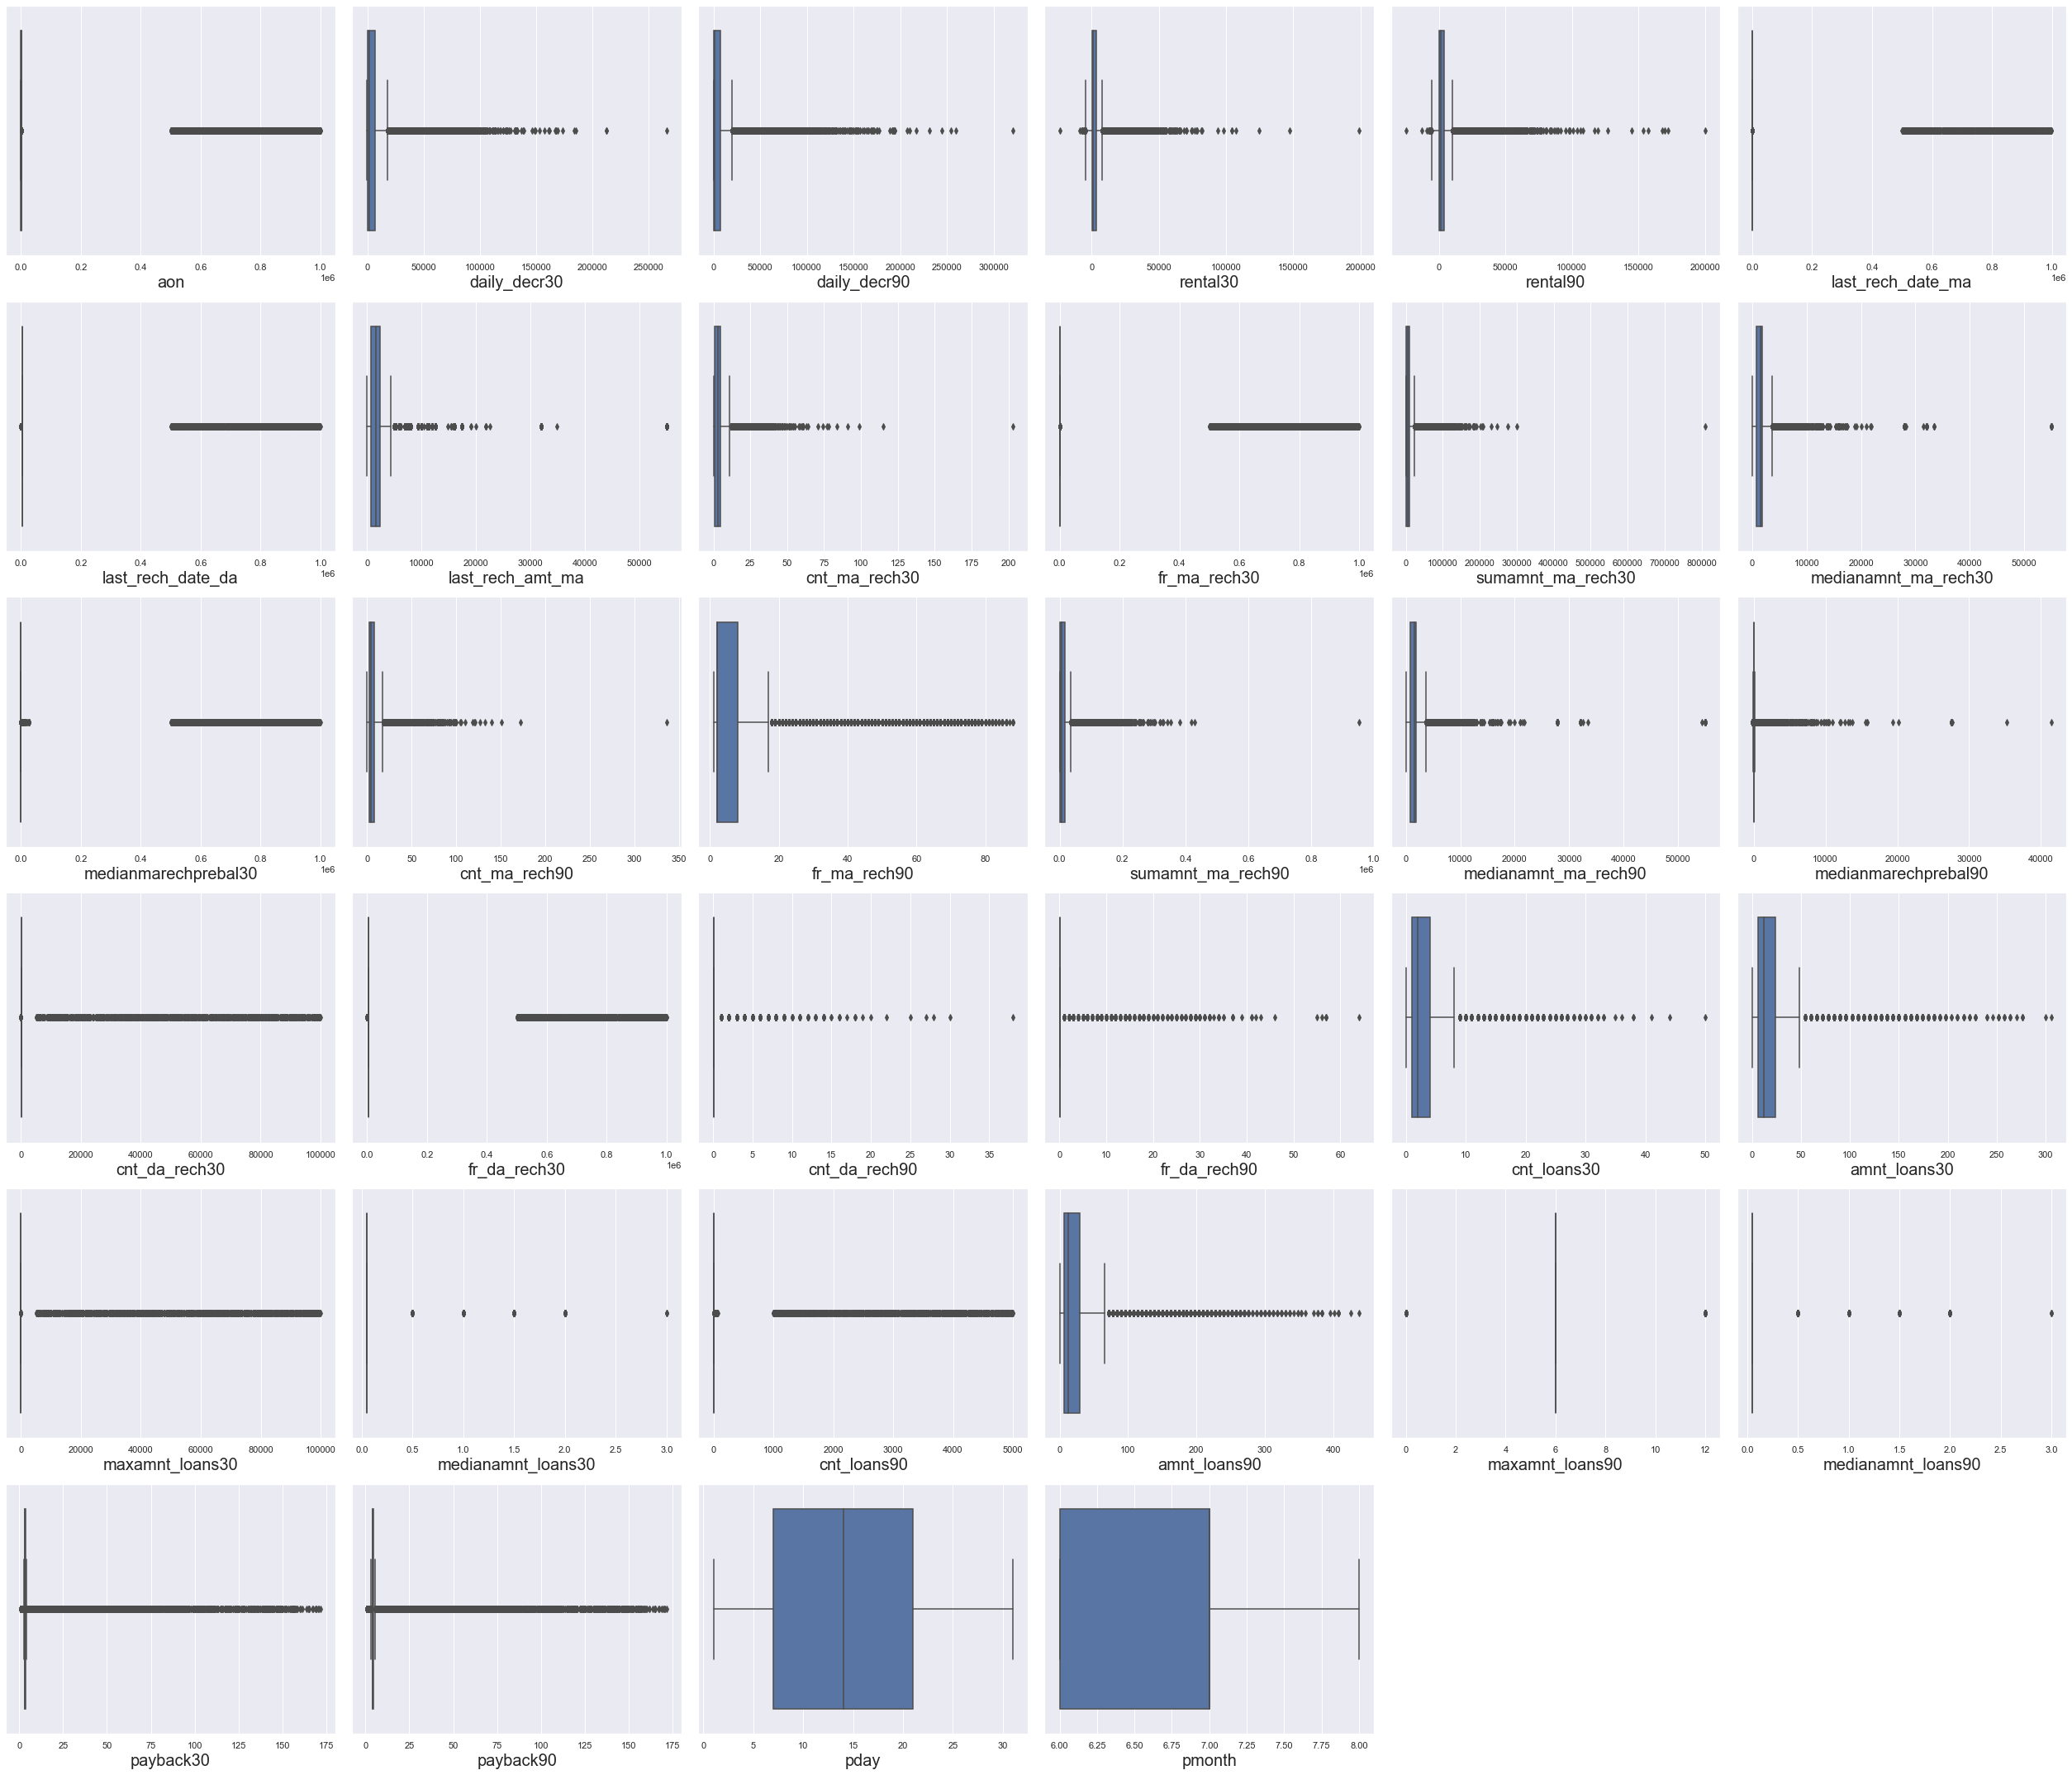

In [32]:
# using boxplot,

plt.figure(figsize=(35,30), facecolor = 'white')
pltnumber = 1

for column in x:
    if pltnumber<=36:
        ax = plt.subplot(6,6,pltnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    pltnumber+=1
plt.tight_layout()

# we can see that outliers exist on most of the columns.

daily_decr90            0.138042
daily_decr30            0.132104
pday                    0.071239
aon                     0.058286
rental90                0.058277
rental30                0.057585
medianmarechprebal90    0.045430
pmonth                  0.044862
sumamnt_ma_rech90       0.043864
sumamnt_ma_rech30       0.041321
medianmarechprebal30    0.040920
cnt_ma_rech90           0.037013
last_rech_date_ma       0.035178
medianamnt_ma_rech90    0.022759
last_rech_amt_ma        0.021663
cnt_ma_rech30           0.019227
fr_ma_rech90            0.017530
medianamnt_ma_rech30    0.017189
payback90               0.014086
fr_ma_rech30            0.012493
amnt_loans90            0.011790
cnt_loans90             0.010997
payback30               0.010565
amnt_loans30            0.009558
cnt_loans30             0.006450
medianamnt_loans30      0.003921
medianamnt_loans90      0.003903
maxamnt_loans30         0.002976
last_rech_date_da       0.002892
maxamnt_loans90         0.002800
cnt_da_rec

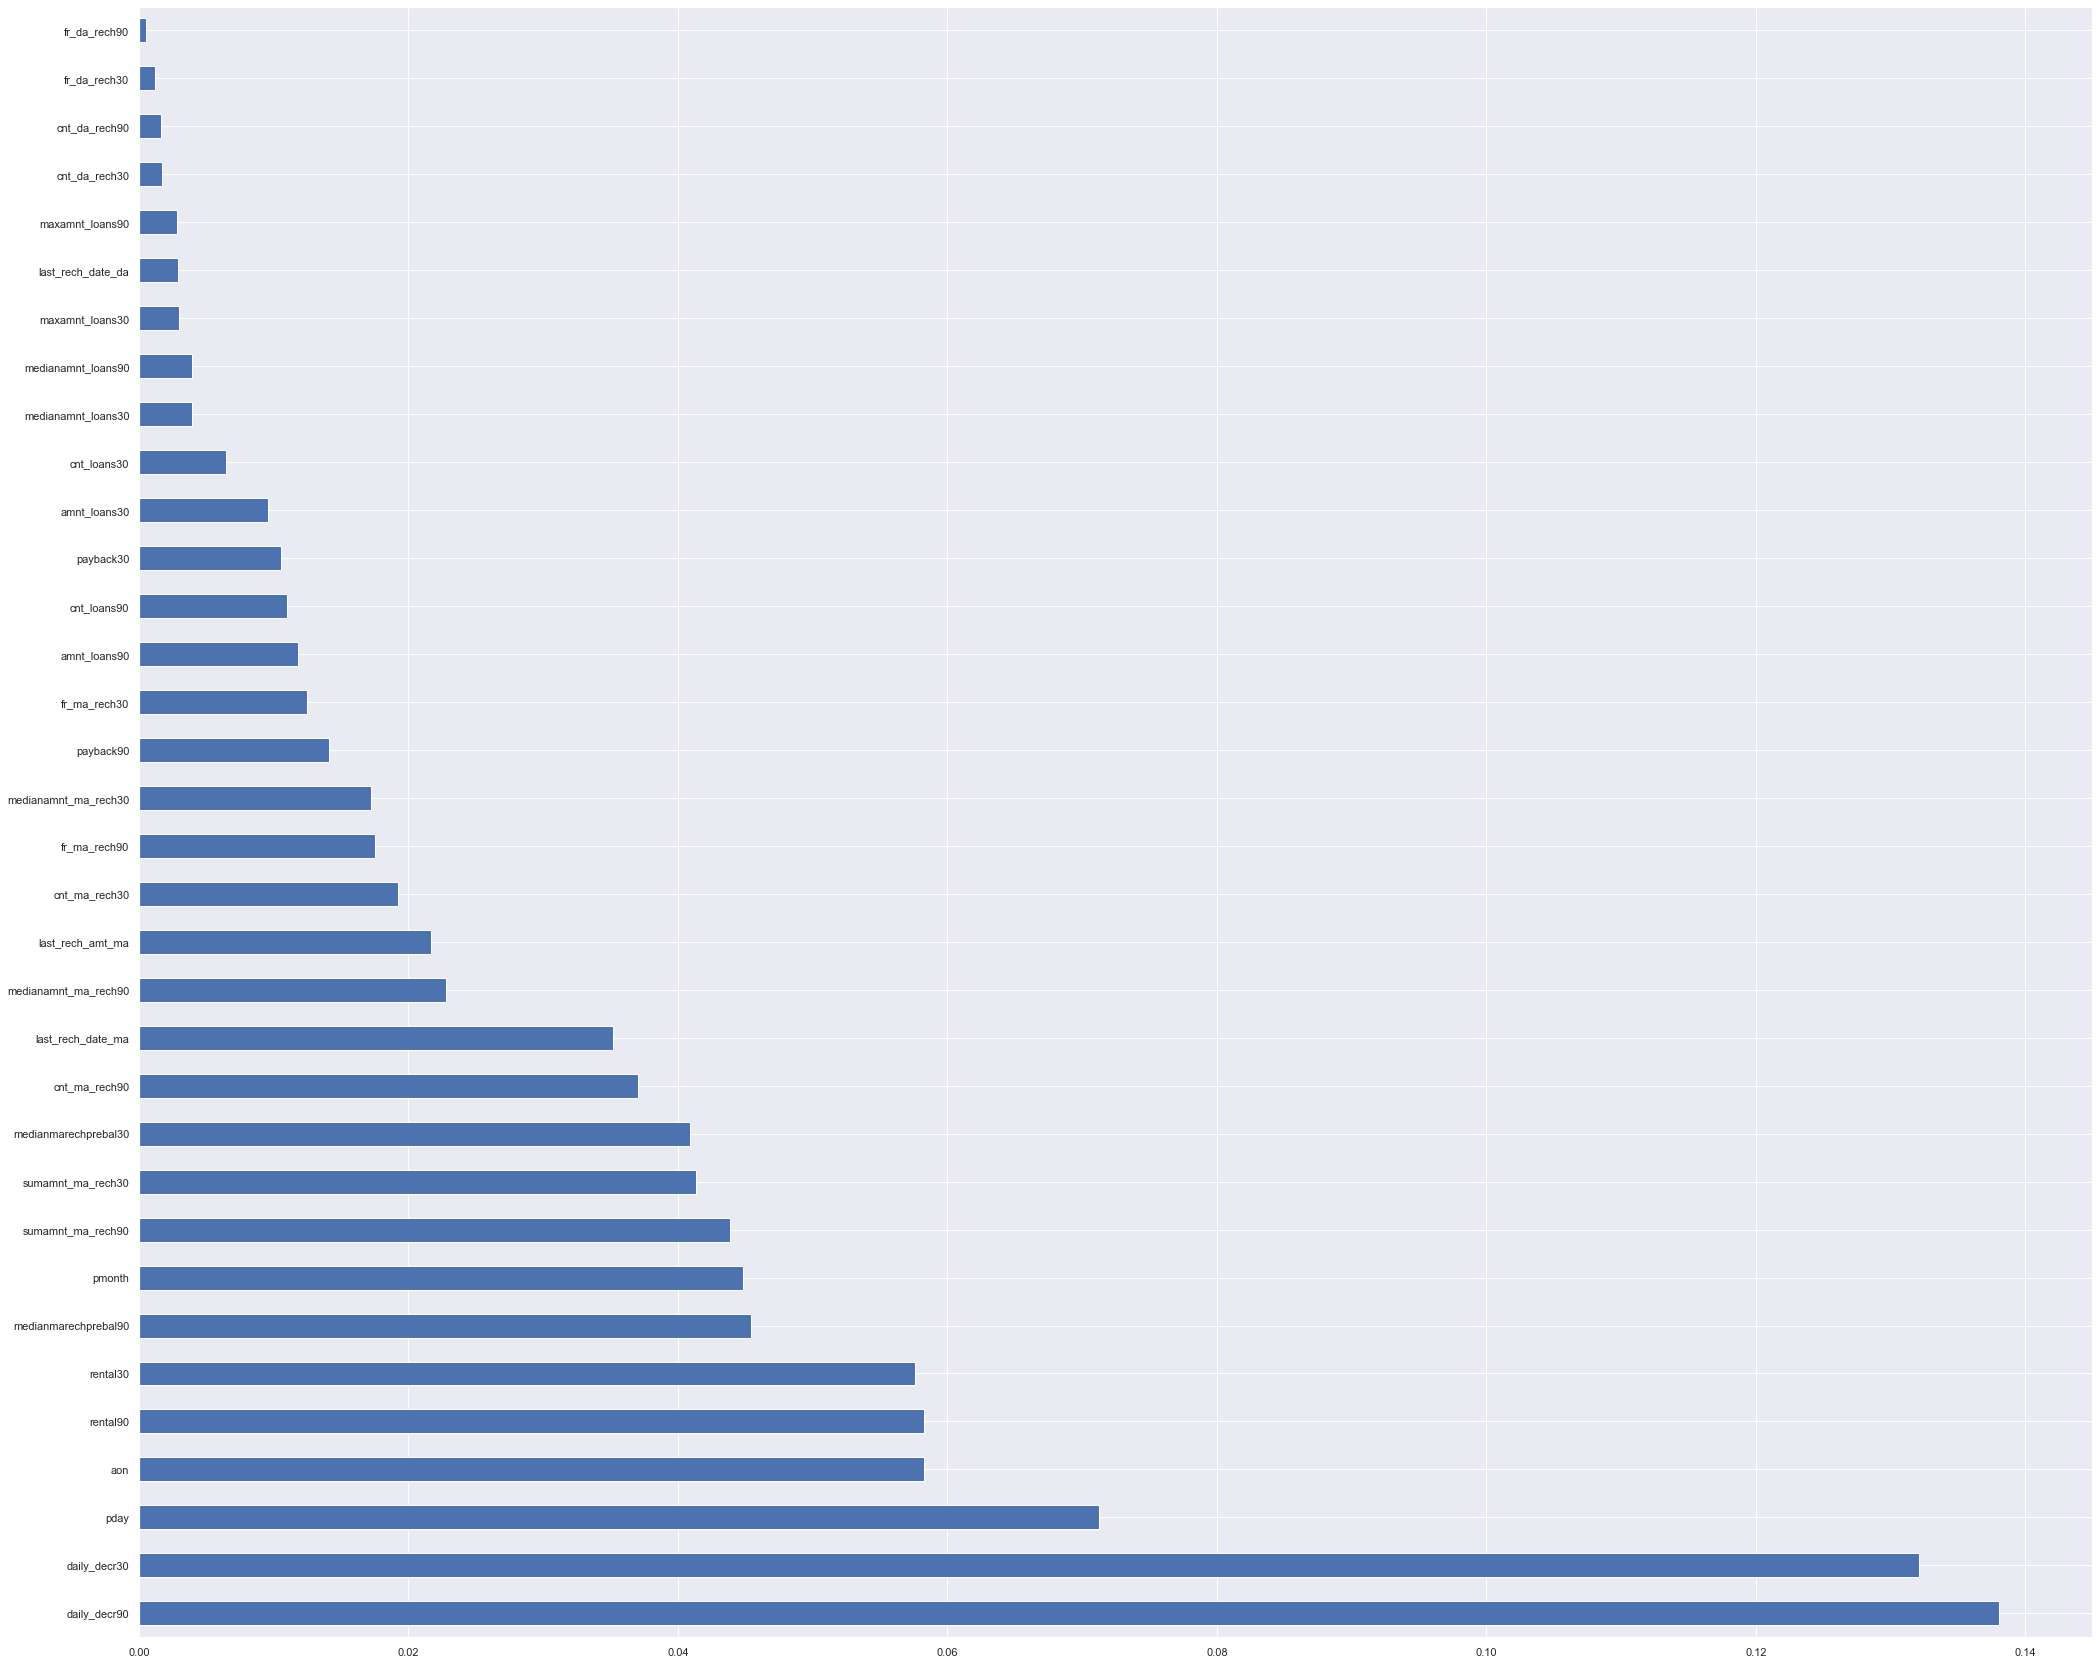

In [33]:
# we will check feature importance before trying to remove outliers/skewness
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x,y)

fea_imp = pd.Series(rfc.feature_importances_, index = x.columns)
fea_imp.nlargest(40).plot(kind= 'barh', figsize = (35,30))
print(fea_imp.nlargest(40))

In [34]:
x.apply(np.sqrt)

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth
0,16.492423,55.272507,55.363797,14.836779,16.128546,1.414214,60.927850,39.230090,1.414214,4.582576,...,2.449490,0.23244,1.414214,3.464102,2.449490,0.214656,5.385165,5.385165,4.472136,2.645751
1,26.683328,110.099955,110.112443,60.755740,60.755740,4.472136,60.927850,76.072334,1.000000,1.414214,...,3.464102,0.23244,1.000000,3.464102,3.464102,0.214656,1.843591,2.078818,3.162278,2.828427
2,23.130067,37.389838,37.389838,30.002167,30.002167,1.732051,60.927850,39.230090,1.000000,1.414214,...,2.449490,0.23244,1.000000,2.449490,2.449490,0.214656,1.843591,2.078818,4.358899,2.828427
3,15.524175,4.607385,4.607385,12.626163,12.626163,6.403124,60.927850,30.773365,0.000000,1.414214,...,2.449490,0.23244,1.414214,3.464102,2.449490,0.214656,1.843591,2.078818,2.449490,2.449490
4,30.773365,12.272707,12.272707,33.149661,33.149661,2.000000,60.927850,48.052055,2.645751,1.414214,...,2.449490,0.23244,2.645751,6.480741,2.449490,0.214656,1.527525,1.527525,4.690416,2.449490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,20.099751,12.323649,12.323649,33.002879,33.002879,1.000000,60.927850,63.623895,1.732051,1.414214,...,2.449490,0.23244,1.414214,3.464102,2.449490,0.214656,1.000000,1.000000,4.123106,2.449490
209589,32.787193,6.077499,6.077499,41.573549,41.573549,2.000000,60.927850,27.802878,2.000000,1.000000,...,2.449490,0.23244,1.732051,4.242641,2.449490,0.214656,1.000000,1.000000,3.464102,2.449490
209590,31.827661,108.826062,109.107058,76.562589,94.303765,1.732051,60.927850,39.230090,2.236068,2.828427,...,3.464102,0.23244,2.449490,7.348469,3.464102,0.214656,2.000000,1.957890,5.385165,2.645751
209591,41.617304,111.750742,112.135498,20.293595,31.378018,1.414214,6.164414,27.802878,2.236068,2.000000,...,3.464102,0.23244,1.732051,4.898979,3.464102,0.214656,1.843591,3.240370,5.000000,2.645751


In [35]:
# applying power transform method for removing skewness
# Tried Zscore method and data loss % is more.

from sklearn.preprocessing import power_transform
df = power_transform(x, method ='yeo-johnson')

df= pd.DataFrame(df,columns=x.columns)

In [36]:
df.skew()  # checking the skew and we can drop the columns which is having less importance and high skewness

aon                      1.654517
daily_decr30            -6.582717
daily_decr90            -7.080193
rental30                -1.022844
rental90                -0.962717
last_rech_date_ma       -5.362529
last_rech_date_da       -1.284108
last_rech_amt_ma        -0.061262
cnt_ma_rech30           -0.000145
fr_ma_rech30             0.312246
sumamnt_ma_rech30       -0.291322
medianamnt_ma_rech30    -0.189628
medianmarechprebal30    -0.119058
cnt_ma_rech90           -0.002465
fr_ma_rech90             0.297811
sumamnt_ma_rech90       -0.192158
medianamnt_ma_rech90    -0.044604
medianmarechprebal90     7.506286
cnt_da_rech30            0.793174
fr_da_rech30            -0.135017
cnt_da_rech90            6.006577
fr_da_rech90            15.469700
cnt_loans30              0.036243
amnt_loans30             0.001948
maxamnt_loans30         -1.680107
medianamnt_loans30       3.447735
cnt_loans90              0.105580
amnt_loans90            -0.008988
maxamnt_loans90          0.364282
medianamnt_loa

In [37]:
x = x.drop(columns = ['fr_da_rech90','medianmarechprebal90','cnt_da_rech90','cnt_da_rech30','medianamnt_loans30','medianamnt_loans90',
                    'maxamnt_loans30','last_rech_date_da','last_rech_date_ma'],axis = 1)


In [38]:
dt = pd.concat([x,y],axis = 1)
dt = dt.dropna()
dt = dt.reset_index(drop= True)
dt.shape

(209593, 26)

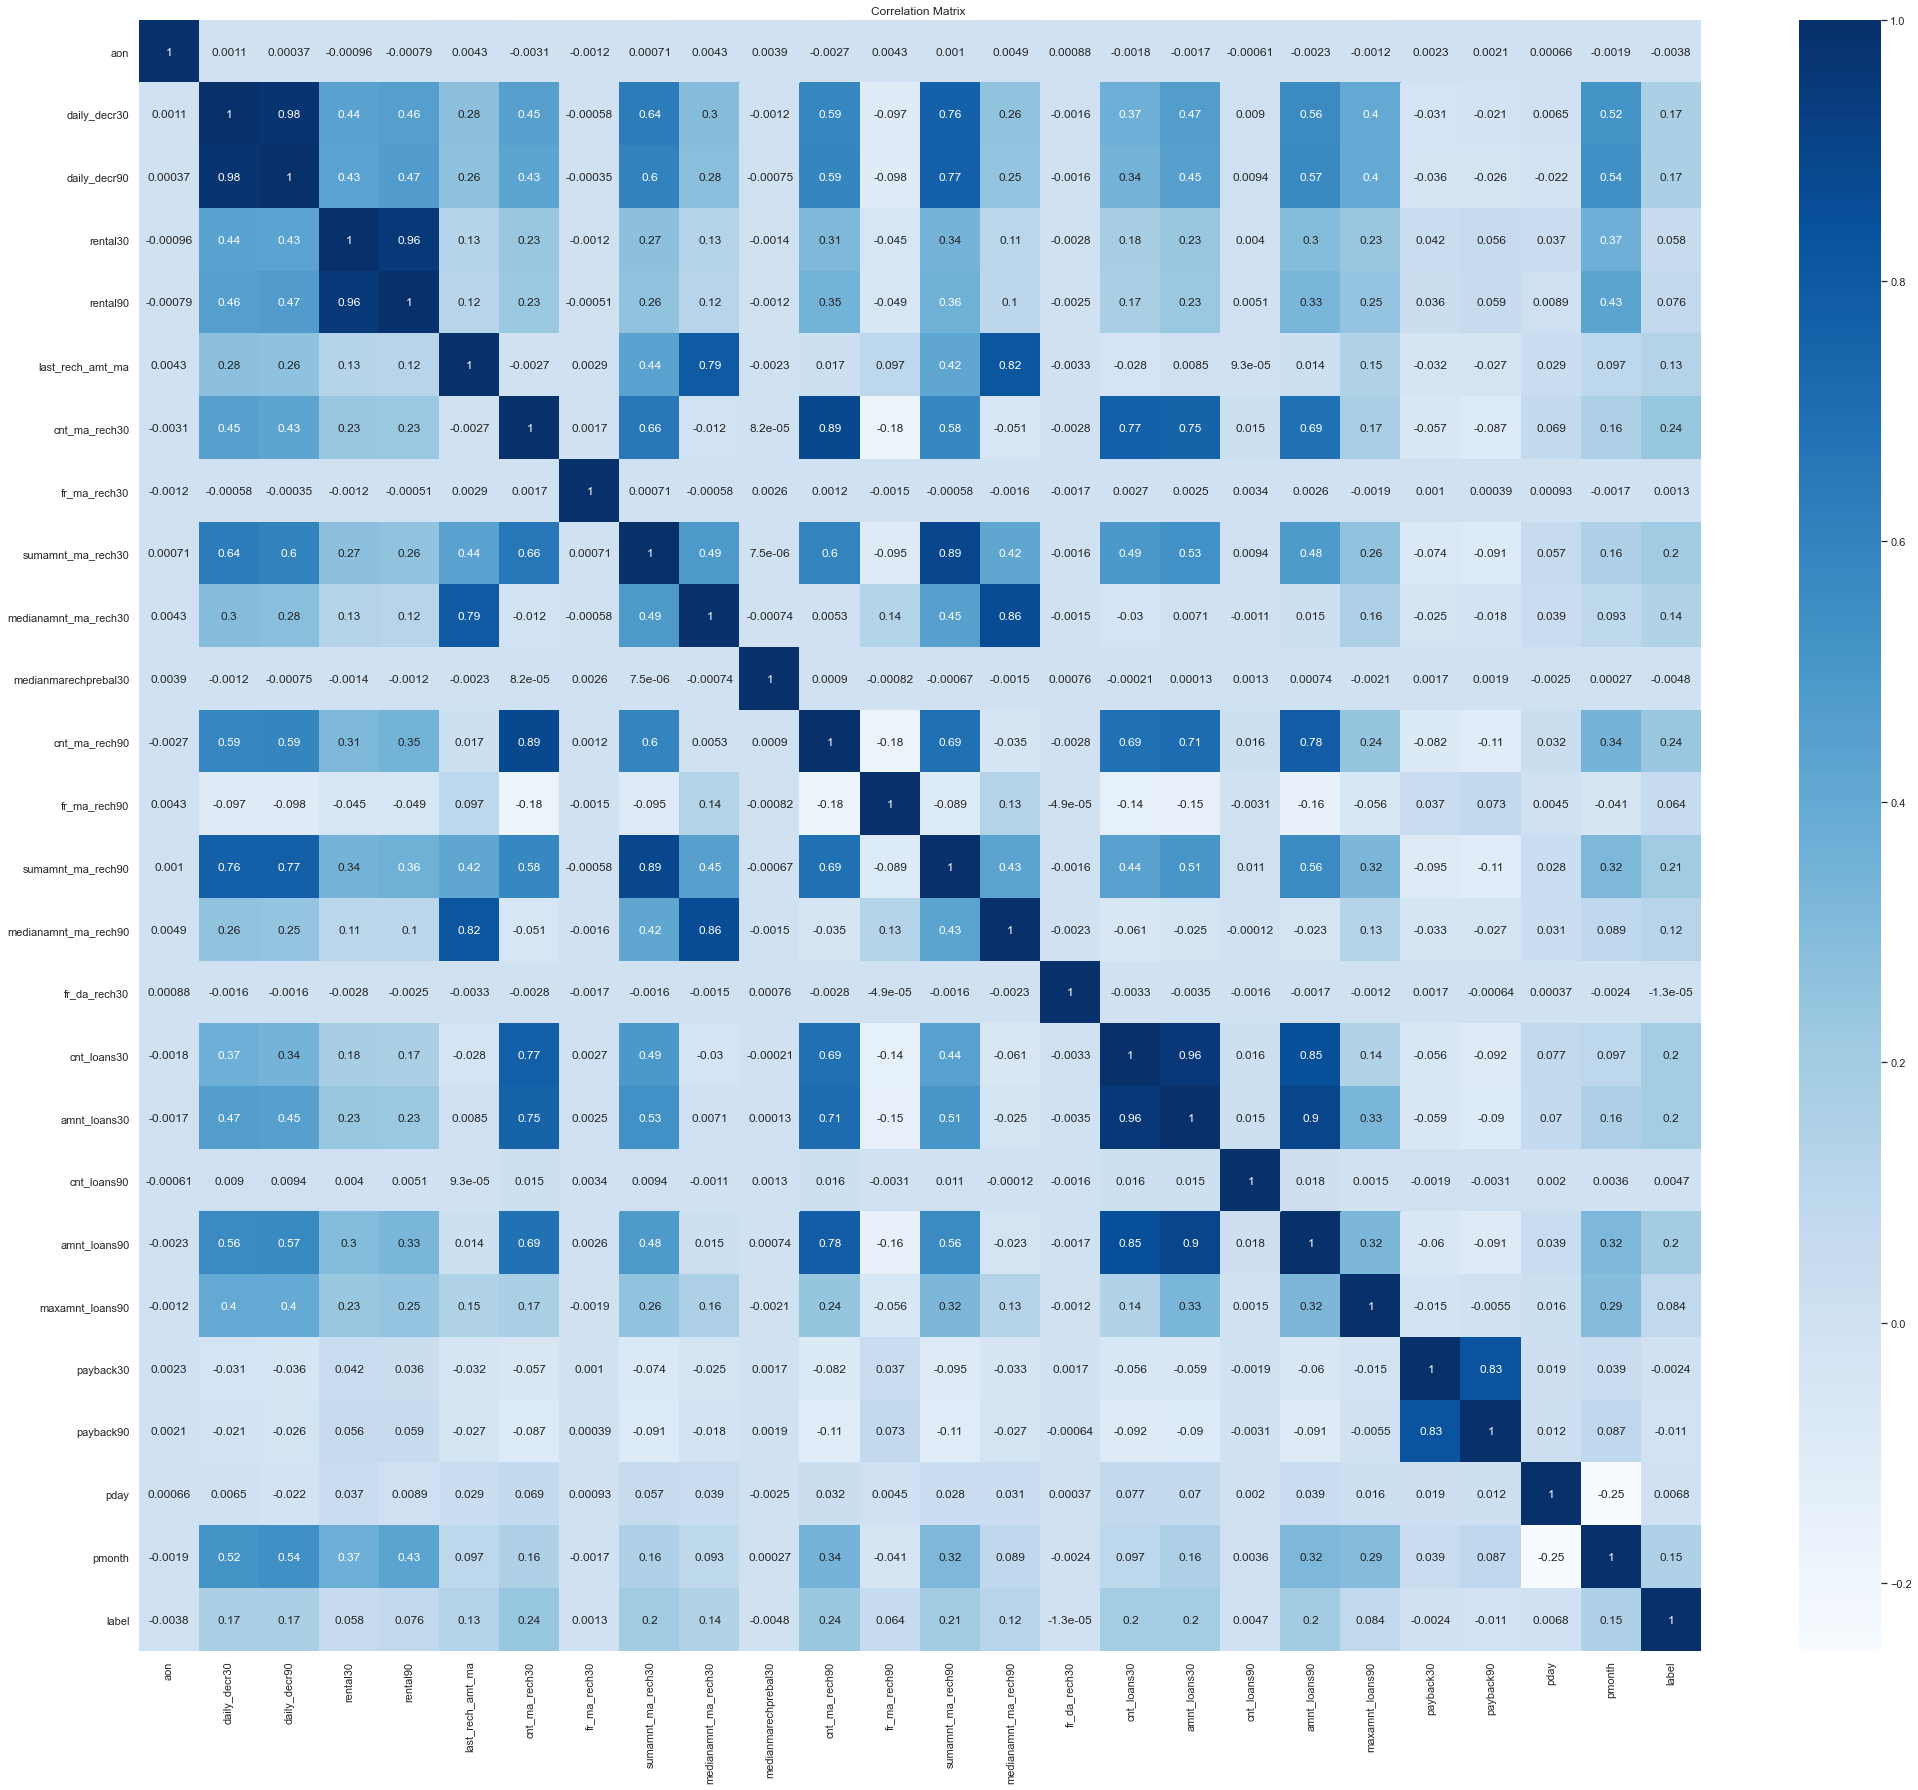

In [39]:
#Correlation matrix after applied skewness/outliers,

corr = dt.corr()
plt.figure(figsize = (35,30))
sns.heatmap(corr,cmap = 'Blues', annot = True)
plt.title("Correlation Matrix ")
plt.show()

In [40]:
#splitting x and y variables
# dropping the extra columns as well 

X = dt.drop(columns = ['label','amnt_loans90','cnt_loans30'],axis = 1)
Y = dt['label']

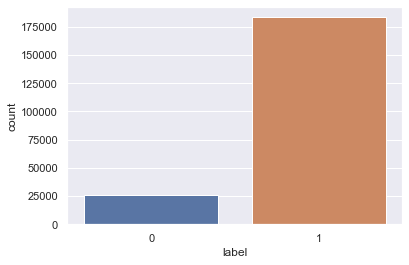

In [41]:
# Checking target varibale is im-balanced or not,

sns.countplot(Y)
plt.show()

In [42]:
# as it is im-balanced, using SMOTE() technique to balance the classes,

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_over,y_over = sm.fit_resample(X,Y)

<AxesSubplot:xlabel='label', ylabel='count'>

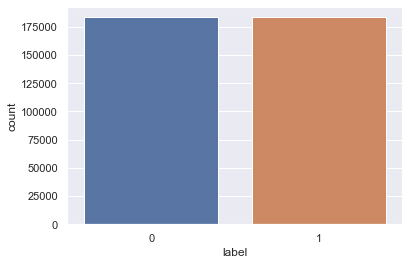

In [43]:
sns.countplot(y_over)

In [44]:
# Scaling the data,

scaler = StandardScaler()
x_sc = scaler.fit_transform(x_over)

In [45]:
#Train test split

x_train,x_test,y_train,y_test = train_test_split(x_sc,y_over, test_size = 0.25, random_state = 111)

We will now build a model and see which one is having high accuracy and also applying cross validation to check whether the model is under fitting or over fitting.

In [46]:
#As target classes are im-balanced, we should use f1 score for calculating model accuracy score,

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
scr_dt = cross_val_score(dt,x_over,y_over,cv=5)


print("F1 score \n", f1_score(y_test,y_pred))
print("CV Score :", scr_dt.mean())
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

F1 score 
 0.901533070521244
CV Score : 0.9001369806159355
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90     45635
           1       0.91      0.89      0.90     46081

    accuracy                           0.90     91716
   macro avg       0.90      0.90      0.90     91716
weighted avg       0.90      0.90      0.90     91716

--------------------------------------------------------

Confusion Matrix 
 [[41560  4075]
 [ 4917 41164]]
ROC AUC Score 
 0.902000544784105


In [47]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
scr_rfc = cross_val_score(rfc,x_over,y_over,cv=5)

print("F1 score \n", f1_score(y_test,y_pred))
print("CV Score  :", scr_rfc.mean())
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

F1 score 
 0.9456622045619864
CV Score  : 0.9426570802337517
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     45635
           1       0.95      0.95      0.95     46081

    accuracy                           0.95     91716
   macro avg       0.95      0.95      0.95     91716
weighted avg       0.95      0.95      0.95     91716

--------------------------------------------------------

Confusion Matrix 
 [[43159  2476]
 [ 2529 43552]]
ROC AUC Score 
 0.9454308886072718


In [48]:
from sklearn.ensemble import AdaBoostClassifier


abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
y_pred = abc.predict(x_test) 
scr_abc = cross_val_score(abc,x_over,y_over,cv=5)

print("F1 score \n", f1_score(y_test,y_pred))
print("CV Score :", scr_abc.mean())
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred)) 

F1 score 
 0.8492281571833882
CV Score : 0.8516254977588325
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86     45635
           1       0.87      0.82      0.85     46081

    accuracy                           0.85     91716
   macro avg       0.85      0.85      0.85     91716
weighted avg       0.85      0.85      0.85     91716

--------------------------------------------------------

Confusion Matrix 
 [[40204  5431]
 [ 8067 38014]]
ROC AUC Score 
 0.8529645813747296


In [49]:
from sklearn.ensemble import GradientBoostingClassifier


gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred = gbc.predict(x_test) 
scr_gbc = cross_val_score(gbc,x_over,y_over,cv=5)

print("F1 score \n", f1_score(y_test,y_pred))
print("CV Score :", scr_gbc.mean())
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

F1 score 
 0.8882718815928992
CV Score : 0.889124656070339
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     45635
           1       0.89      0.88      0.89     46081

    accuracy                           0.89     91716
   macro avg       0.89      0.89      0.89     91716
weighted avg       0.89      0.89      0.89     91716

--------------------------------------------------------

Confusion Matrix 
 [[40865  4770]
 [ 5451 40630]]
ROC AUC Score 
 0.8885916303261491


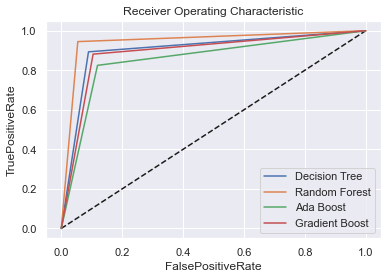

In [50]:
#ROC Curve for all models

y_pred_prob1 = dt.predict(x_test)
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = rfc.predict(x_test)
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

y_pred_prob3 = abc.predict(x_test)
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = gbc.predict(x_test)
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)



plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Decision Tree")
plt.plot(fpr2, tpr2, label= "Random Forest")
plt.plot(fpr3, tpr3, label= "Ada Boost")
plt.plot(fpr4, tpr4, label= "Gradient Boost")
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('Receiver Operating Characteristic')
plt.show()

Random forest is the model which is having high accuracy score among all other models but when comparing with cross val score , the model which is having less difference between score and cv score is best model and here we can tell " decision tree " as best model.

In [51]:
#Lets try to improve the accuracy of model by hyper parameter tuning,

param = {'criterion' : ['gini','entropy'] ,
         'splitter': ['best','random'],'min_samples_split' : [6,12,18,24,30,36],
         'max_features': [10,12,14,16,18],
         'min_samples_leaf':[2,4,6,8,10,12]}

In [52]:
# Applying randomized search CV to increase the accuracy,

rg = RandomizedSearchCV(dt, param_distributions = param, cv= 5)
rg.fit(x_train,y_train)
rg.best_params_

{'splitter': 'best',
 'min_samples_split': 36,
 'min_samples_leaf': 12,
 'max_features': 14,
 'criterion': 'entropy'}

In [53]:
#final model accuracy,

model = DecisionTreeClassifier(min_samples_split = 18, min_samples_leaf = 4, 
                               max_features = 12, criterion = 'entropy',splitter = 'best' )
                               
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


print("F1 score \n", f1_score(y_test,y_pred))
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

F1 score 
 0.901454028643271
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.91      0.90     45635
           1       0.91      0.89      0.90     46081

    accuracy                           0.90     91716
   macro avg       0.90      0.90      0.90     91716
weighted avg       0.90      0.90      0.90     91716

--------------------------------------------------------

Confusion Matrix 
 [[41474  4161]
 [ 4853 41228]]
ROC AUC Score 
 0.9017527149276139


Model has constant the accuray 91%

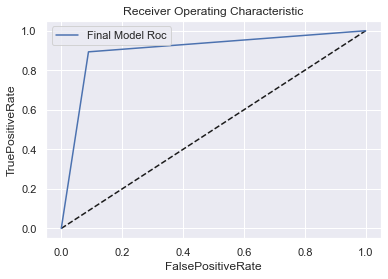

In [54]:
#Roc Curve for final model,

y_pred_fin = model.predict(x_test)
fpr , tpr, thresholds = roc_curve(y_test, y_pred_fin)


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Final Model Roc")
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('Receiver Operating Characteristic')
plt.show()

In [55]:
# Saving the model pkl file ,

import joblib
joblib.dump(model,'micro_Credit.pkl')

['micro_Credit.pkl']